### Reading and Understanding the Dataset

In [41]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings

%matplotlib inline
pd.set_option("display.max_rows", None,"display.max_columns", None)
warnings.simplefilter(action='ignore')
plt.style.use('seaborn')

In [42]:
#load dataset
df_main = pd.read_csv('../input/vehicle-dataset-from-cardekho/car data.csv')

In [43]:
# Displaying the first few rows of the DataFrame
df_main.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [44]:
# Retrieving the dimensions of the DataFrame
df_main.shape

(301, 9)

In [45]:
# Displaying concise summary of DataFrame information
df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [46]:
# Generating descriptive statistics for numerical columns in the DataFrame
df_main.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


This code snippet is generating descriptive statistics for numerical columns in a DataFrame named `df_main`.

- **count:** The number of non-null values in each column.
- **mean:** The average value of each column.
- **std:** The standard deviation of each column, which measures the dispersion of values around the mean.
- **min:** The minimum value in each column.
- **25%:** The 25th percentile, also known as the first quartile. It indicates the value below which 25% of the data falls.
- **50%:** The median, also known as the 50th percentile or the second quartile. It represents the middle value of the dataset.
- **75%:** The 75th percentile, also known as the third quartile. It indicates the value below which 75% of the data falls.
- **max:** The maximum value in each column.

These statistics provide insights into the central tendency, dispersion, and distribution of numerical data in the DataFrame.

In [47]:
# Calculating the sum of missing values for each column in the DataFrame
df_main.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

indicates that there are no missing values in any of the columns of the DataFrame.

### Data Preprocessing

In [48]:
# Adding a new column 'Age' to the DataFrame
df_main['Age'] = 2020 - df_main['Year']
# Dropping the 'Year' column from the DataFrame
df_main.drop('Year',axis=1,inplace = True)

In [49]:
# Renaming selected columns in the DataFrame
df_main.rename(columns = {'Selling_Price':'Selling_Price(lacs)','Present_Price':'Present_Price(lacs)','Owner':'Past_Owners'},inplace = True)

### Exploratory Data Analysis (EDA)

#### Univariate Analysis

In [50]:
# Retrieving the column names of the DataFrame
df_main.columns

Index(['Car_Name', 'Selling_Price(lacs)', 'Present_Price(lacs)', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Past_Owners', 'Age'],
      dtype='object')

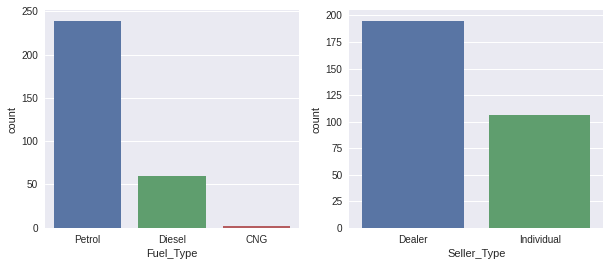

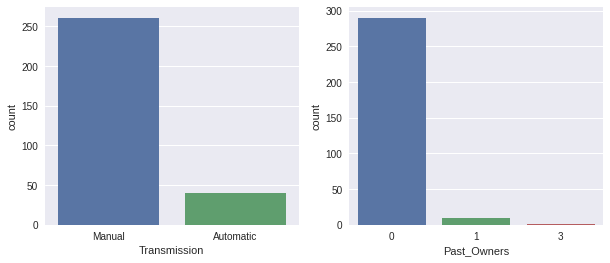

In [51]:
cat_cols = ['Fuel_Type','Seller_Type','Transmission','Past_Owners']
i=0
while i < 4:
    fig = plt.figure(figsize=[10,4])    
    #ax1.title.set_text(cat_cols[i])
    plt.subplot(1,2,1)
    sns.countplot(x=cat_cols[i], data=df_main)
    i += 1
    
    #ax2.title.set_text(cat_cols[i])
    plt.subplot(1,2,2)
    sns.countplot(x=cat_cols[i], data=df_main)
    i += 1
    
    plt.show()

In [52]:
import pandas as pd
import plotly.express as px

# List of categorical columns to plot
cat_cols = ['Fuel_Type', 'Seller_Type', 'Transmission', 'Past_Owners']

# Loop through each categorical column
for col in cat_cols:
    # Calculate value counts for the current column
    counts = df_main[col].value_counts()
    
    # Create a pie chart for the current column
    fig = px.pie(names=counts.index, values=counts.values, title=f'Distribution of {col}')
    fig.show()


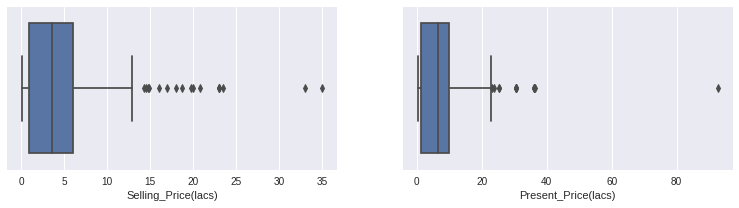

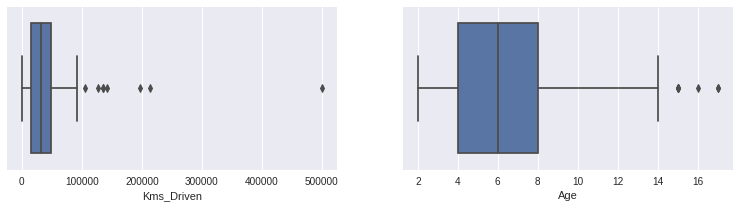

In [53]:
# List of numerical columns to plot
num_cols = ['Selling_Price(lacs)', 'Present_Price(lacs)', 'Kms_Driven', 'Age']

# Initialize a counter variable
i = 0

# Loop through each numerical column
while i < 4:
    # Create a new figure for the plots with a specified size
    fig = plt.figure(figsize=[13, 3])
    
    # Plot the box plot for the first numerical column
    plt.subplot(1, 2, 1)
    sns.boxplot(x=num_cols[i], data=df_main)
    i += 1  # Increment the counter
    
    # Plot the box plot for the second numerical column
    plt.subplot(1, 2, 2)
    sns.boxplot(x=num_cols[i], data=df_main)
    i += 1  # Increment the counter
    
    # Display the plots
    plt.show()


In [54]:
import plotly.express as px

num_cols = ['Selling_Price(lacs)','Present_Price(lacs)','Kms_Driven','Age']

for i in range(0, len(num_cols), 2):
    fig = px.box(df_main, x=num_cols[i], title=num_cols[i])
    fig.update_layout(title_x=0.5)  # Center the title
    fig.show()

    if i+1 < len(num_cols):
        fig = px.box(df_main, x=num_cols[i+1], title=num_cols[i+1])
        fig.update_layout(title_x=0.5)  # Center the title
        fig.show()


In [55]:
# # List of numerical columns to plot
# num_cols = ['Selling_Price(lacs)', 'Present_Price(lacs)', 'Kms_Driven', 'Age']

# # Initialize a counter variable
# i = 0

# # Loop through each numerical column
# while i < 4:
#     # Create a new figure for the plots with a specified size
#     fig = plt.figure(figsize=[13, 3])
    
#     # Plot the box plot for the first numerical column
#     plt.subplot(1, 2, 1)
#     sns.boxplot(x=num_cols[i], data=df_main)
#     i += 1  # Increment the counter
    
#     # Plot the box plot for the second numerical column
#     plt.subplot(1, 2, 2)
#     sns.boxplot(x=num_cols[i], data=df_main)
#     i += 1  # Increment the counter
    
#     # Display the plots
#     plt.show()


In [56]:
# Filtering the DataFrame based on a condition
df_main[df_main['Present_Price(lacs)'] > df_main['Present_Price(lacs)'].quantile(0.99)]

,Car_Name,Selling_Price(lacs),Present_Price(lacs),Kms_Driven,Fuel_Type,Seller_Type,Transmission,Past_Owners,Age
64,fortuner,33.0,36.23,6000,Diesel,Dealer,Automatic,0,3
86,land cruiser,35.0,92.60,78000,Diesel,Dealer,Manual,0,10


these are the cars with present prices higher than the 99% of **present prices** in the DataFrame

In [57]:
df_main[df_main['Selling_Price(lacs)'] > df_main['Selling_Price(lacs)'].quantile(0.99)]

,Car_Name,Selling_Price(lacs),Present_Price(lacs),Kms_Driven,Fuel_Type,Seller_Type,Transmission,Past_Owners,Age
63,fortuner,23.5,35.96,47000,Diesel,Dealer,Automatic,0,5
64,fortuner,33.0,36.23,6000,Diesel,Dealer,Automatic,0,3
86,land cruiser,35.0,92.60,78000,Diesel,Dealer,Manual,0,10


These are the cars with **selling prices** higher than the 99% of selling prices in the DataFrame.

In [58]:
df_main[df_main['Kms_Driven'] > df_main['Kms_Driven'].quantile(0.99)]

,Car_Name,Selling_Price(lacs),Present_Price(lacs),Kms_Driven,Fuel_Type,Seller_Type,Transmission,Past_Owners,Age
84,innova,3.49,13.46,197176,Diesel,Dealer,Manual,0,15
179,Honda Karizma,0.31,1.05,213000,Petrol,Individual,Manual,0,10
196,Activa 3g,0.17,0.52,500000,Petrol,Individual,Automatic,0,12


These are the cars with **kilometers driven** higher than the 99% of kilometers driven in the DataFrame.

#### Bivariate/Multi-Variate Analysis

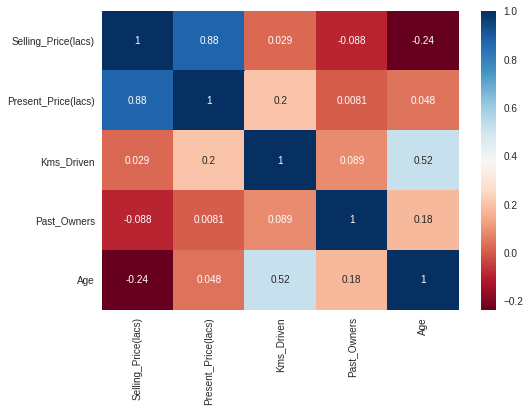

In [59]:
# Generate a heatmap of the correlation matrix
sns.heatmap(df_main.corr(), annot=True, cmap="RdBu")
# Display the heatmap
plt.show()

In [60]:
import plotly.graph_objects as go

# Create a heatmap of the correlation matrix
fig = go.Figure(data=go.Heatmap(
                   z=df_main.corr(),
                   x=df_main.columns,
                   y=df_main.columns,
                   colorscale='RdBu',
                   hoverongaps=False))

# Add annotations
fig.update_layout(title="Correlation Matrix Heatmap",
                  xaxis_title="Features",
                  yaxis_title="Features")

fig.show()


In [61]:
# Calculating correlation coefficients between 'Selling_Price(lacs)' and other columns
df_main.corr()['Selling_Price(lacs)']

Selling_Price(lacs)    1.000000
Present_Price(lacs)    0.878983
Kms_Driven             0.029187
Past_Owners           -0.088344
Age                   -0.236141
Name: Selling_Price(lacs), dtype: float64

**Present_Price(lacs): 0.878983**
Strong positive correlation .As the present price increases, the selling price tends to increase as well.

**Kms_Driven: 0.029187**
a weak positive correlation. it means that the kilometers driven can affect on the price , but weakly.

**Past_Owners: -0.088344**
weak negative correlation As the number of past owners increases, the selling price tends to slightly decrease.

**Age: -0.236141**
moderate negative correlation. As the age of the cars increases, the selling price tends to decrease.

In [62]:
# Creating a pivot table
df_main.pivot_table(values='Selling_Price(lacs)', index = 'Seller_Type', columns= 'Fuel_Type')

Fuel_Type,CNG,Diesel,Petrol
Seller_Type,,,
Dealer,3.1,10.181525,5.252388
Individual,NaN,16.000000,0.726857


**For dealers:**
* Selling prices for cars with CNG fuel type average around 3.1 lakh rupees.
* Selling prices for cars with diesel fuel type average around 10.18 lakh rupees.
* Selling prices for cars with petrol fuel type average around 5.25 lakh rupees.

**For individual sellers:**
* There are no records of cars with CNG fuel type being sold by individual sellers.
* Selling prices for cars with diesel fuel type average around 16 lakh rupees.
* Selling prices for cars with petrol fuel type average around 0.73 lakh rupees.

In [63]:
df_main.pivot_table(values='Selling_Price(lacs)', index = 'Seller_Type', columns= 'Transmission')

Transmission,Automatic,Manual
Seller_Type,,
Dealer,12.246552,5.756506
Individual,1.968182,0.743895


**For dealers:**
* The average selling price of cars with automatic transmission is approximately 12.25 lakh rupees.
* The average selling price of cars with manual transmission is approximately 5.76 lakh rupees.

**For individual sellers:**
* The average selling price of cars with automatic transmission is approximately 1.97 lakh rupees.
* The average selling price of cars with manual transmission is approximately 0.74 lakh rupees.

### Data Preparation

#### Creating Dummies for Categorical Features

In [64]:
# Dropping the 'Car_Name' column from the DataFrame
df_main.drop(labels='Car_Name',axis= 1, inplace = True)

In [65]:
df_main.head()

,Selling_Price(lacs),Present_Price(lacs),Kms_Driven,Fuel_Type,Seller_Type,Transmission,Past_Owners,Age
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,7
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,3
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,9
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,6


In [66]:
# Applying one-hot encoding to categorical variables
#  used to convert categorical variables into a set of binary variables,
df_main = pd.get_dummies(data = df_main,drop_first=True) 

In [67]:
df_main.head()

,Selling_Price(lacs),Present_Price(lacs),Kms_Driven,Past_Owners,Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,6,0,1,0,1
1,4.75,9.54,43000,0,7,1,0,0,1
2,7.25,9.85,6900,0,3,0,1,0,1
3,2.85,4.15,5200,0,9,0,1,0,1
4,4.60,6.87,42450,0,6,1,0,0,1


### Train-Test Split

In [68]:
# Assigning the target variable
y = df_main['Selling_Price(lacs)']

# Assigning the feature variables
X = df_main.drop('Selling_Price(lacs)', axis=1)

In [69]:
from sklearn.model_selection import train_test_split

In [70]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Printing the shapes of the resulting sets
print("x train: ",X_train.shape)
print("x test: ",X_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

x train:  (240, 8)
x test:  (61, 8)
y train:  (240,)
y test:  (61,)


* The training set (X_train) contains 240 samples and 8 features.
* The testing set (X_test) contains 61 samples and 8 features.
* The training set labels (y_train) contains 240 target values.
* The testing set labels (y_test) contains 61 target values.


### Model Creation/Evaluation

* In the modeling phase, regression models were chosen for predicting vehicle prices based on various features. 
* The decision to use regression models instead of classifiers is based on the nature of the target variable and the task at hand.

#### Applying regression models
1. Linear Regression 
2. Ridge Regression
3. Lasso Regression
4. Random Forest Regression
5. Gradient Boosting regression

In [71]:
# Importing the r2_score function from the metrics module
from sklearn.metrics import r2_score
# Importing the cross_val_score function from the model_selection module
from sklearn.model_selection import cross_val_score

In [74]:
import plotly.graph_objects as go

CV = []       # List to store cross-validation scores
R2_train = [] # List to store R2 scores of the train set
R2_test = []  # List to store R2 scores of the test set

def car_pred_model(model, model_name):
    # Training model
    model.fit(X_train, y_train)
            
    # R2 score of train set
    y_pred_train = model.predict(X_train)
    R2_train_model = r2_score(y_train, y_pred_train)
    R2_train.append(round(R2_train_model, 2))
    
    # R2 score of test set
    y_pred_test = model.predict(X_test)
    R2_test_model = r2_score(y_test, y_pred_test)
    R2_test.append(round(R2_test_model, 2))
    
    # R2 mean of train set using Cross validation
    cross_val = cross_val_score(model, X_train, y_train, cv=5)
    cv_mean = cross_val.mean()
    CV.append(round(cv_mean, 2))
    
    # Printing results
    print("Train R2-score :", round(R2_train_model, 2))
    print("Test R2-score :", round(R2_test_model, 2))
    print("Train CV scores :", cross_val)
    print("Train CV mean :", round(cv_mean, 2))
    
    # Plotting Graphs 
    # Residual Plot of train data
    fig = go.Figure()
    fig.add_trace(go.Histogram(x=y_train-y_pred_train, histnorm='probability density', name='Residual Plot of Train samples', marker_color='blue'))
    fig.update_layout(title='Residual Plot of Train samples', xaxis_title='y_train - y_pred_train', yaxis_title='Probability Density')
    fig.show()
    
    # Y_test vs Y_train scatter plot
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=y_test, y=y_pred_test, mode='markers', name='y_test vs y_pred_test', marker=dict(color='red')))
    fig.update_layout(title='y_test vs y_pred_test', xaxis_title='y_test', yaxis_title='y_pred_test')
    fig.show()


#### Standard Linear Regression or Ordinary Least Squares

In [75]:
# Importing LinearRegression class from sklearn.linear_model module
from sklearn.linear_model import LinearRegression
# Instantiating LinearRegression model
lr = LinearRegression()
# Calling the car_pred_model function to train and evaluate the linear regression model
car_pred_model(lr,"Linear_regressor.pkl")

Train R2-score : 0.88
Test R2-score : 0.86
Train CV scores : [0.89912189 0.89838688 0.82980069 0.81769076 0.76113925]
Train CV mean : 0.84


#### Ridge

In [76]:
 # Importing Ridge regression class from sklearn.linear_model module
from sklearn.linear_model import Ridge
# Importing RandomizedSearchCV class from sklearn.model_selection module
from sklearn.model_selection import RandomizedSearchCV

# Creating Ridge model object
rg = Ridge()
# range of alpha 
alpha = np.logspace(-3,3,num=14)

# Creating RandomizedSearchCV to find the best estimator of hyperparameter
rg_rs = RandomizedSearchCV(estimator = rg, param_distributions = dict(alpha=alpha))

# Calling the car_pred_model function to train and evaluate the Ridge regression model
car_pred_model(rg_rs,"ridge.pkl")

Train R2-score : 0.88
Test R2-score : 0.86
Train CV scores : [0.89912126 0.8983878  0.82980292 0.81769305 0.73377277]
Train CV mean : 0.84


#### Lasso

In [77]:
# Importing Lasso regression class from sklearn.linear_model module
from sklearn.linear_model import Lasso
# Importing RandomizedSearchCV class from sklearn.model_selection module
from sklearn.model_selection import RandomizedSearchCV

# Creating Lasso model object
ls = Lasso()

# Range of alpha values
alpha = np.logspace(-3,3,num=14)

# Creating RandomizedSearchCV to find the best estimator of hyperparameter
ls_rs = RandomizedSearchCV(estimator = ls, param_distributions = dict(alpha=alpha))

In [78]:
car_pred_model(ls_rs,"lasso.pkl")

Train R2-score : 0.88
Test R2-score : 0.86
Train CV scores : [0.8990973  0.89975361 0.8301628  0.81769086 0.70210321]
Train CV mean : 0.83


#### Random Forest

In [79]:
# Importing Random Forest regressor class from sklearn.ensemble module
from sklearn.ensemble import RandomForestRegressor
# Importing RandomizedSearchCV class from sklearn.model_selection module
from sklearn.model_selection import RandomizedSearchCV

# Creating Random Forest regressor object
rf = RandomForestRegressor()

# Number of trees in Random forest
n_estimators=list(range(500,1000,100))
# Maximum number of levels in a tree
max_depth=list(range(4,9,4))
# Minimum number of samples required to split an internal node
min_samples_split=list(range(4,9,2))
# Minimum number of samples required to be at a leaf node.
min_samples_leaf=[1,2,5,7]
# Number of fearures to be considered at each split
max_features=['auto','sqrt']

# Hyperparameters dict
param_grid = {"n_estimators":n_estimators,
              "max_depth":max_depth,
              "min_samples_split":min_samples_split,
              "min_samples_leaf":min_samples_leaf,
              "max_features":max_features}

# Creating RandomizedSearchCV to find the best estimator of hyperparameters
rf_rs = RandomizedSearchCV(estimator = rf, param_distributions = param_grid)

In [80]:
car_pred_model(rf_rs,'random_forest.pkl')

Train R2-score : 0.94
Test R2-score : 0.81
Train CV scores : [0.87782072 0.96428046 0.8099219  0.93036748 0.74380311]
Train CV mean : 0.87


In [81]:
print(rf_rs.best_estimator_)

RandomForestRegressor(max_depth=4, min_samples_leaf=2, min_samples_split=8,
                      n_estimators=500)


#### Gradient Boosting

In [82]:
# Importing Gradient Boosting regressor class from sklearn.ensemble module
from sklearn.ensemble import GradientBoostingRegressor
# Importing RandomizedSearchCV class from sklearn.model_selection module
from sklearn.model_selection import RandomizedSearchCV

# Creating Gradient Boosting regressor object
gb = GradientBoostingRegressor()

# Defining ranges for hyperparameters
learning_rate = [0.001, 0.01, 0.1, 0.2] # Rate at which correcting is being made
n_estimators=list(range(500,1000,100)) # Number of trees in Gradient boosting
max_depth=list(range(4,9,4)) # Maximum number of levels in a tree
min_samples_split=list(range(4,9,2)) # Minimum number of samples required to split an internal node
min_samples_leaf=[1,2,5,7] # Minimum number of samples required to be at a leaf node.
max_features=['auto','sqrt'] # Number of fearures to be considered at each split

# Hyperparameters dict
param_grid = {"learning_rate":learning_rate,
              "n_estimators":n_estimators,
              "max_depth":max_depth,
              "min_samples_split":min_samples_split,
              "min_samples_leaf":min_samples_leaf,
              "max_features":max_features}
# Creating RandomizedSearchCV to find the best estimator of hyperparameters
gb_rs = RandomizedSearchCV(estimator = gb, param_distributions = param_grid)

In [83]:
car_pred_model(gb_rs,"gradient_boosting.pkl")

Train R2-score : 1.0
Test R2-score : 0.95
Train CV scores : [0.9332355  0.95383753 0.87946133 0.92718767 0.69728904]
Train CV mean : 0.88


In [84]:
# List of regression models
Technique = ["LinearRegression","Ridge","Lasso","RandomForestRegressor","GradientBoostingRegressor"]
# Creating a DataFrame to store the results
results=pd.DataFrame({'Model': Technique,'R Squared(Train)': R2_train,'R Squared(Test)': R2_test,'CV score mean(Train)': CV})
# Displaying the results DataFrame
display(results)

,Model,R Squared(Train),R Squared(Test),CV score mean(Train)
0,LinearRegression,0.88,0.86,0.84
1,Ridge,0.88,0.86,0.84
2,Lasso,0.88,0.86,0.83
3,RandomForestRegressor,0.94,0.81,0.87
4,GradientBoostingRegressor,1.00,0.95,0.88
